# Import Libraries

In [4]:
# Imoprting Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (15,8)

# Load specific forecasting tools
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Imoprt the Dataset

In [5]:
df_daily = pd.read_csv('salesdaily.xls', index_col = "datum", parse_dates = True)

In [6]:
df_daily.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


## Plot the data for R06

<AxesSubplot:xlabel='datum'>

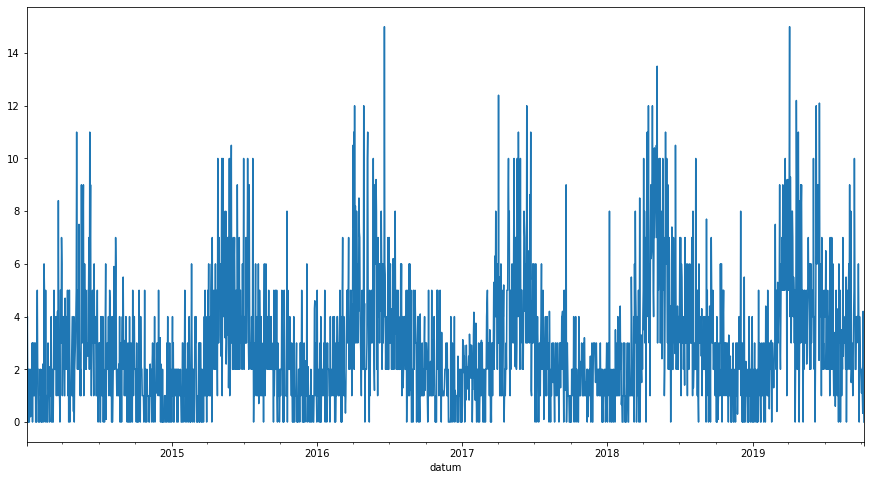

In [7]:
df_daily['R06'].plot(figsize=(15,8)) 

In [8]:
df_daily.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


# EDA

[Text(0.5, 0, ''), Text(0, 0.5, '# of items sold')]

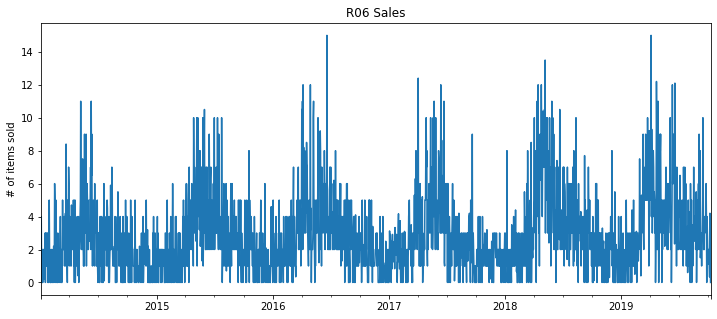

In [9]:
# Plot the raw dataset
title='R06 Sales'
ylabel='# of items sold'
xlabel='' # we don't really need a label here

ax = df_daily['R06'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [10]:
df_monthlymean = df_daily['R06'].resample('MS').mean().to_frame()

In [11]:
df_monthlymean

,R06
datum,
2014-01-01,1.606667
2014-02-01,1.292857
2014-03-01,2.754839
2014-04-01,2.456667
2014-05-01,3.990323
...,...
2019-06-01,5.201333
2019-07-01,3.393548
2019-08-01,3.138710


# ETS Decomposition Test to understand the Trend, Seasonality of the Data

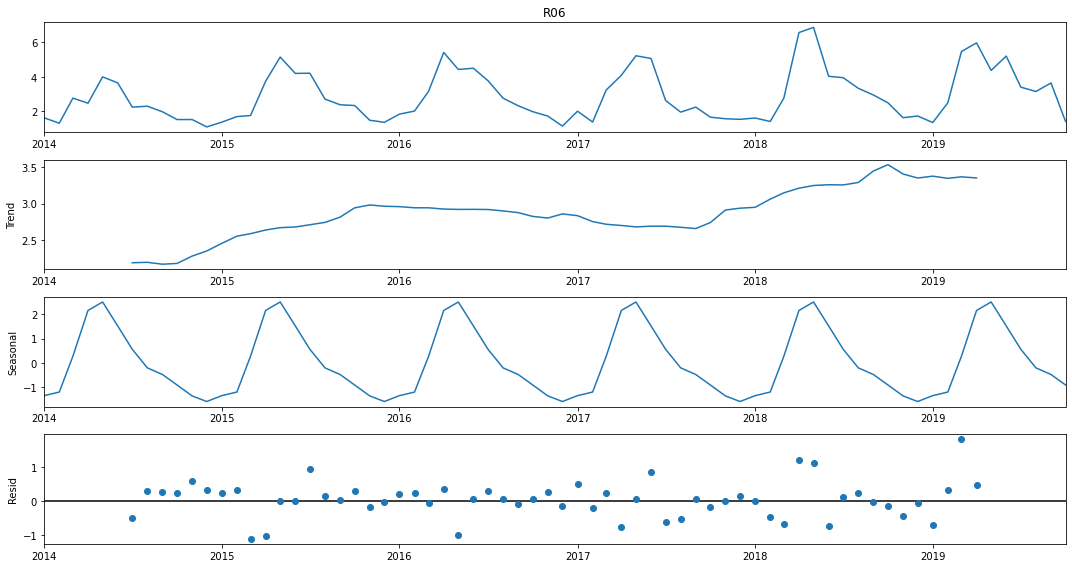

In [13]:
# RUN ETS Decomposition test
result = seasonal_decompose(df_monthlymean['R06'], model='add')
result.plot();

<AxesSubplot:xlabel='datum'>

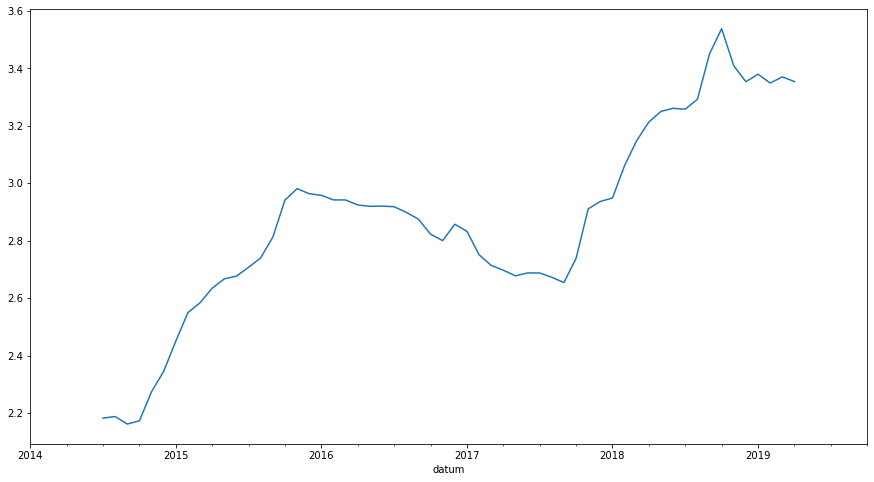

In [14]:
result.trend.plot()

In [15]:
df_monthlymean['moving average R06'] = df_monthlymean['R06'].rolling(window=12).mean()

In [16]:
df_monthlymean[['moving average R06','R06']].head(20)

,moving average R06,R06
datum,,
2014-01-01,NaN,1.606667
2014-02-01,NaN,1.292857
2014-03-01,NaN,2.754839
2014-04-01,NaN,2.456667
2014-05-01,NaN,3.990323
2014-06-01,NaN,3.643333
2014-07-01,NaN,2.229032
2014-08-01,NaN,2.283871
2014-09-01,NaN,1.960000


<AxesSubplot:xlabel='datum'>

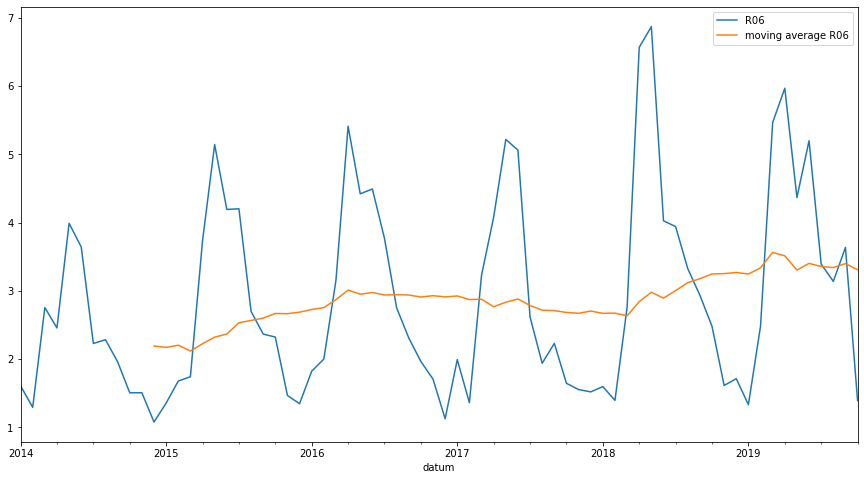

In [17]:
df_monthlymean[['R06','moving average R06']].plot(legend = True)

# EWMA - Exponential Weighted Moving Average

In [18]:
# Exponentially weighted mvoing average
df_monthlymean['emwa'] = df_monthlymean['R06'].ewm(span=12).mean()

<AxesSubplot:xlabel='datum'>

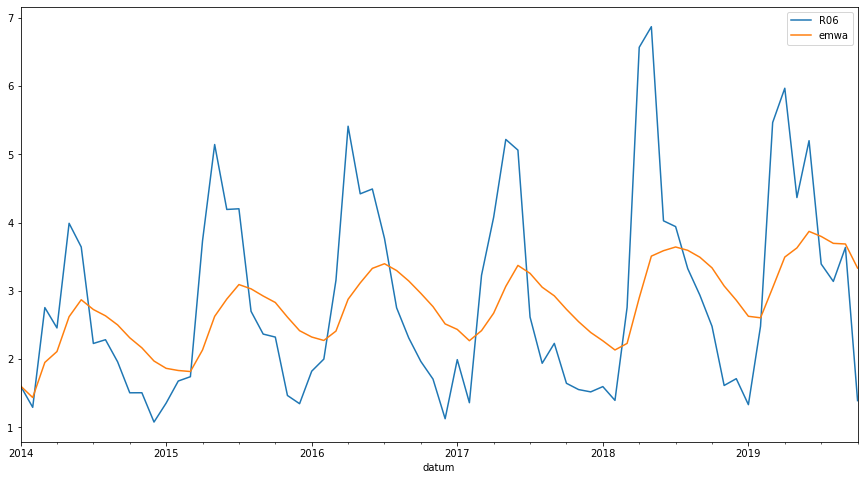

In [19]:
df_monthlymean[['R06', 'emwa']].plot()

In [20]:
span = 23
alpha = 2/(span+1)
df_monthlymean['ewma12'] = df_monthlymean['R06'].ewm(alpha =alpha, adjust=False).mean()

<AxesSubplot:xlabel='datum'>

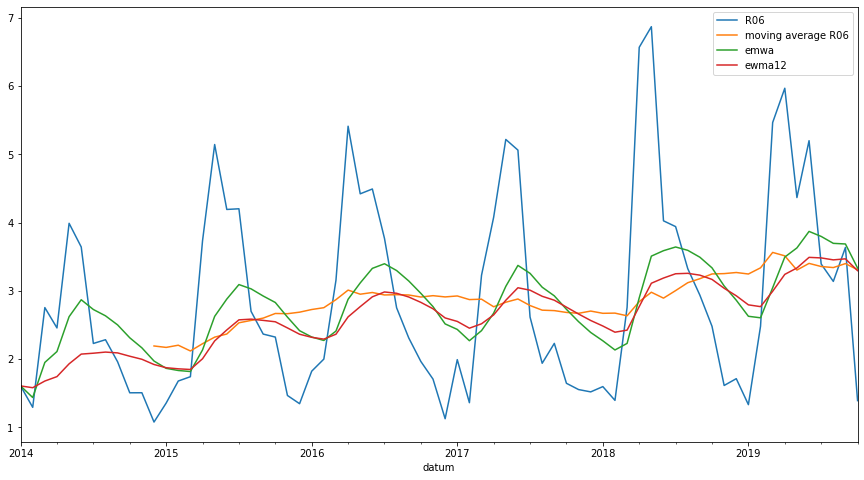

In [21]:
df_monthlymean.plot(legend = True)

In [22]:
model = SimpleExpSmoothing(df_monthlymean['R06'])

/Users/amrutagajananbhat/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [23]:
hwFittedModel = model.fit(smoothing_level = alpha, optimized = False)

In [24]:
hwFittedModel.fittedvalues

datum
2014-01-01    1.606667
2014-02-01    1.606667
2014-03-01    1.580516
2014-04-01    1.678376
2014-05-01    1.743234
                ...   
2019-06-01    3.335629
2019-07-01    3.491104
2019-08-01    3.482975
2019-09-01    3.454286
2019-10-01    3.469484
Freq: MS, Length: 70, dtype: float64

<AxesSubplot:xlabel='datum'>

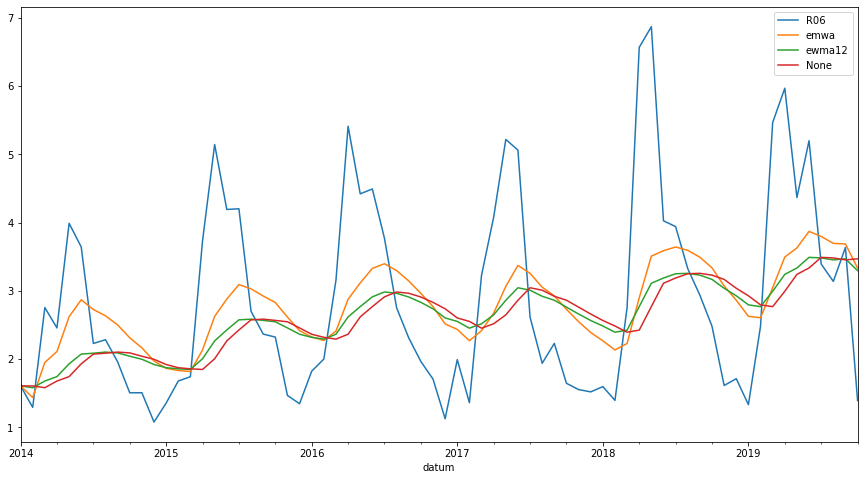

In [25]:
df_monthlymean[['R06', 'emwa', 'ewma12']].plot()
hwFittedModel.fittedvalues.plot(legend = True)

In [22]:
# Double Exponenential Smoothing

/Users/amrutagajananbhat/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


<AxesSubplot:xlabel='datum'>

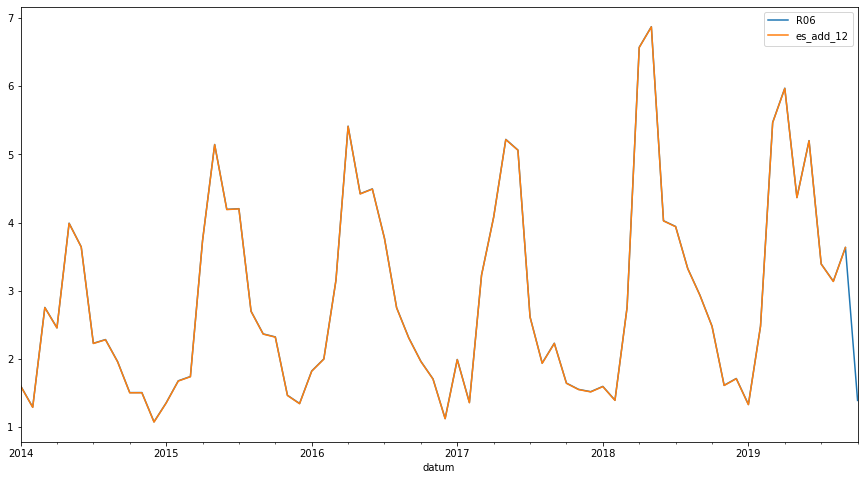

In [26]:
df_monthlymean['es_add_12'] = ExponentialSmoothing(df_monthlymean['R06'], trend = 'add').fit().fittedvalues.shift(-1)
df_monthlymean[['R06', 'es_add_12']].plot(figsize=(15,8))

# train-test split

In [27]:
train_data = df_monthlymean.iloc[:48]
test_data = df_monthlymean.iloc[48:]

/Users/amrutagajananbhat/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


<AxesSubplot:xlabel='datum'>

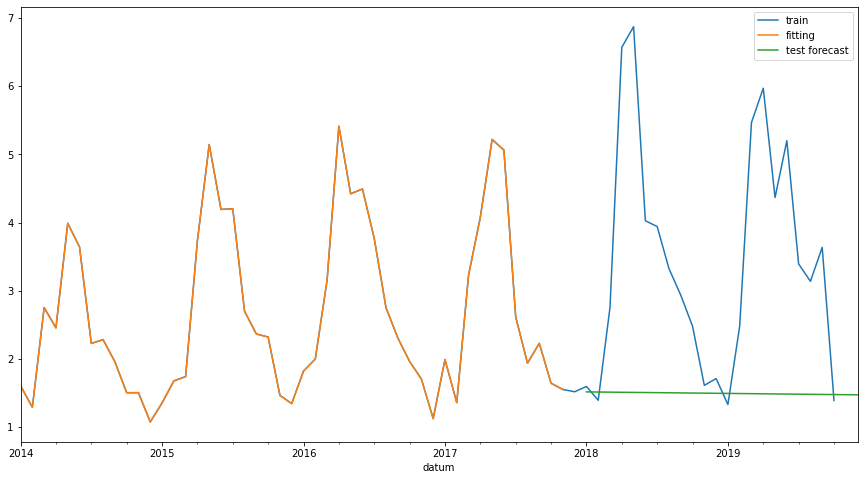

In [28]:
# The curve fits well. Lets try forecasting into the future
des_fitted_model = ExponentialSmoothing(train_data['R06'], trend = 'add').fit()
des_forecast_test = des_fitted_model.forecast(24)

df_monthlymean['R06'].plot(figsize=(15,8), legend=True, label = "train")
des_fitted_model.fittedvalues.shift(-1).plot(legend = True, label = "fitting")
des_forecast_test.plot(legend = True, label = "test forecast")

# Forecast values are not accurate. Look for Third Exponential Smoothing

/Users/amrutagajananbhat/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


<AxesSubplot:xlabel='datum'>

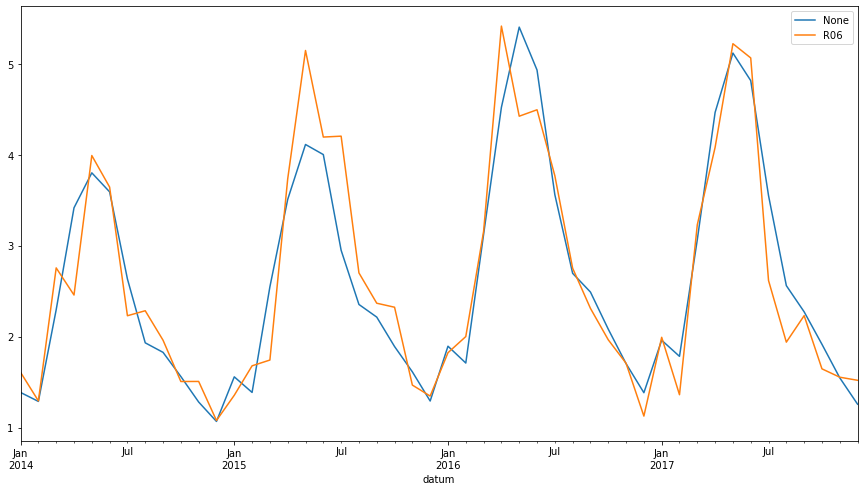

In [29]:
# Third exponential smoothing
fitted_model = ExponentialSmoothing(train_data['R06'], trend = 'mul', seasonal='mul', seasonal_periods = 12).fit()

fitted_model.fittedvalues.plot(legend= True)
train_data['R06'].plot(legend = True)

In [30]:
test_predictions = fitted_model.predict(start = test_data.index[0], end=test_data.index[-1])

test_predictions

2018-01-01    1.888124
2018-02-01    1.713354
2018-03-01    3.053371
2018-04-01    4.412258
2018-05-01    5.122815
2018-06-01    4.805081
2018-07-01    3.516359
2018-08-01    2.638878
2018-09-01    2.429822
2018-10-01    2.053770
2018-11-01    1.693880
2018-12-01    1.375433
2019-01-01    2.004466
2019-02-01    1.818928
2019-03-01    3.241513
2019-04-01    4.684131
2019-05-01    5.438471
2019-06-01    5.101160
2019-07-01    3.733029
2019-08-01    2.801480
2019-09-01    2.579543
2019-10-01    2.180318
Freq: MS, dtype: float64

<AxesSubplot:xlabel='datum'>

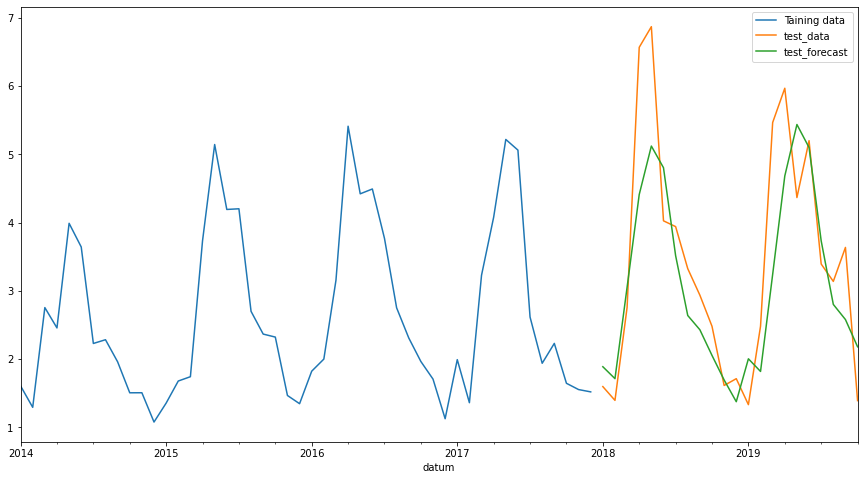

In [31]:
train_data['R06'].plot(legend = True, label="Taining data")
test_data['R06'].plot(legend = True, label= "test_data")

test_predictions.plot(legend=True, label="test_forecast")

### Conclusion: HW tripple exponential Additive Model is the best

# Evaluation metrics

In [32]:
test_data['R06']

datum
2018-01-01    1.596774
2018-02-01    1.395000
2018-03-01    2.758065
2018-04-01    6.570000
2018-05-01    6.872258
2018-06-01    4.026667
2018-07-01    3.941935
2018-08-01    3.325806
2018-09-01    2.936667
2018-10-01    2.480645
2018-11-01    1.613333
2018-12-01    1.712903
2019-01-01    1.332258
2019-02-01    2.482143
2019-03-01    5.467742
2019-04-01    5.970000
2019-05-01    4.367742
2019-06-01    5.201333
2019-07-01    3.393548
2019-08-01    3.138710
2019-09-01    3.636667
2019-10-01    1.391250
Freq: MS, Name: R06, dtype: float64

In [33]:
test_predictions

2018-01-01    1.888124
2018-02-01    1.713354
2018-03-01    3.053371
2018-04-01    4.412258
2018-05-01    5.122815
2018-06-01    4.805081
2018-07-01    3.516359
2018-08-01    2.638878
2018-09-01    2.429822
2018-10-01    2.053770
2018-11-01    1.693880
2018-12-01    1.375433
2019-01-01    2.004466
2019-02-01    1.818928
2019-03-01    3.241513
2019-04-01    4.684131
2019-05-01    5.438471
2019-06-01    5.101160
2019-07-01    3.733029
2019-08-01    2.801480
2019-09-01    2.579543
2019-10-01    2.180318
Freq: MS, dtype: float64

In [34]:
mean_absolute_error(test_data['R06'], test_predictions)

0.7543718004238058

In [35]:
mae = mean_absolute_error(test_data['R06'], test_predictions)
mse = mean_squared_error(test_data['R06'], test_predictions)

print(mae, mse, np.sqrt(mse))

0.7543718004238058 0.9288693705374533 0.9637786937557051


# forecast into the future

In [36]:
final_model = ExponentialSmoothing(df_monthlymean['R06'], trend = 'add', seasonal='mul', seasonal_periods = 12).fit()

forecast_predictions = final_model.forecast(12)

/Users/amrutagajananbhat/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


<AxesSubplot:xlabel='datum'>

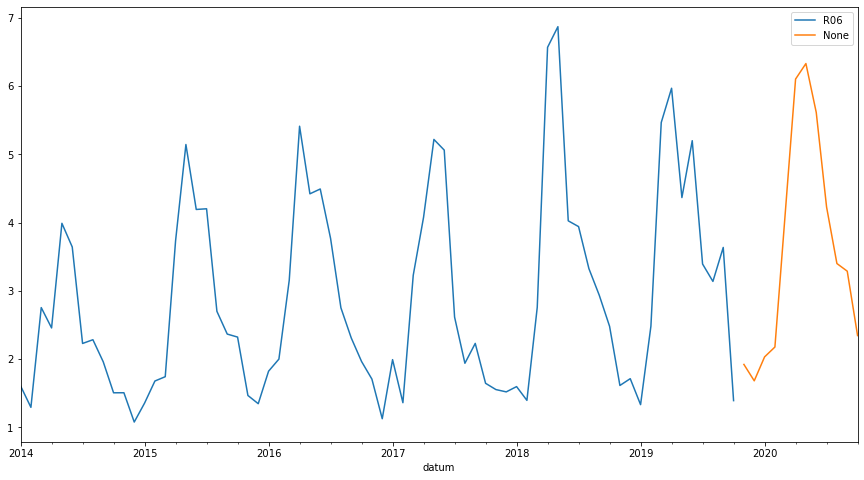

In [37]:
df_monthlymean['R06'].plot(legend = True)
forecast_predictions.plot(legend = True)

# Done